# Sample from truncated exponential

We want to sample from a truncated exponential based on 3 values: minimum, maximum and average.  Depending on those values, we want to take out the shape parameter $\lambda$ for the exponential function.  In this notebook, I will mostly write functions and check code to verify our approach is reasonable.

In [2]:
from __future__ import division

import numpy as np
import seaborn as sns
import scipy

%matplotlib inline

### Define quantile function and sample function from truncated exponential

In [9]:
def itexp(x,lam,trunc):
    i = -np.log(1-x*(1-np.exp(-trunc*lam)))/lam
    return i
    
def rtexp(n,lam,min,max):
    trunc = max-min
    r = itexp(np.random.uniform(0,1,n),lam,trunc) + min
    return r

def etexp(lam,min,max,mean):
    trunc = max-min
    exp = 1/lam-trunc*(np.exp(lam*trunc)-1)**(-1)+min
    return exp

def diftexp(lam,min,max,mean):
    exp = etexp(lam,min,max,mean)
    return((exp-mean)**2)

### Try new functions and plot histogram

mean of distribution: 4.43513811778


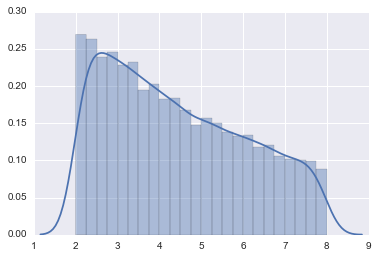

In [4]:
nsamp = 10000
min = 2
max = 8
lam = 0.2

rand_exp = rtexp(nsamp,lam,min,max)

sns.distplot(rand_exp)
print("mean of distribution: "+str(np.mean(rand_exp)))

In [11]:
mean = np.mean(rand_exp)

opt = scipy.optimize.minimize(diftexp,[1.5],
                              args=(min,max,mean,))

opt.x

array([ 0.19243165])